# <u><b> League of Legends winner by 10 minutes</b></u>

In this notebook we try to make a model that can predict the winner in a hugh elo (high diamond) game of league of legends using classification.

The paramaters that we are using are as follows:

* gameId - Unique RIOT ID of the game. Can be used with the Riot Games API
* blueWins - The target column. 1 if the blue team has won, 0 otherwise
* blueWardsPlaced - Number of warding totems placed by the blue team on the map
* blueWardsDestroyed - Number of enemy warding totems the blue team has destroyed
* blueFirstBlood - First kill of the game. 1 if the blue team did the first kill, 0 otherwise
* blueKills - Number of enemies killed by the blue team
* blueDeaths - Number of deaths (blue team)
* blueAssists - Number of kill assists (blue team)
* blueEliteMonsters - Number of elite monsters killed by the blue team (Dragons and Heralds)
* blueDragons - Number of dragons killed by the blue team
* blueHeralds - Number of heralds killed by the blue team
* blueTowersDestroyed - Number of towers destroyed by the blue team
* blueTotalGold - Blue team total gold
* blueAvgLevel - Blue team average champion level
* blueTotalExperience - Blue team total experience
* blueTotalMinionsKilled - Blue team total minions killed (CS)
* blueTotalJungleMinionsKilled - Blue team total jungle monsters killed
* blueGoldDiff - Blue team gold difference compared to the enemy team
* blueExperienceDiff - Blue team experience difference compared to the enemy team
* blueCSPerMin - Blue team CS (minions) per minute
* blueGoldPerMin - Blue team gold per minute
* redWardsPlaced - Number of warding totems placed by the red team on the map
* redWardsDestroyed - Number of enemy warding totems the red team has destroyed
* redFirstBlood - First kill of the game. 1 if the red team did the first kill, 0 otherwise
* redKills - Number of enemies killed by the red team
* redDeaths - Number of deaths (red team)
* redAssists - Number of kill assists (red team)
* redEliteMonsters - Number of elite monsters killed by the red team (Dragons and Heralds)
* redDragons - Number of dragons killed by the red team
* redHeralds - Number of heralds killed by the red team
* redTowersDestroyed - Number of towers destroyed by the red team
* redTotalGold - Red team total gold
* redAvgLevel - Red team average champion level
* redTotalExperience - Red team total experience
* redTotalMinionsKilled - Red team total minions killed (CS)
* redTotalJungleMinionsKilled - Red team total jungle monsters killed
* redGoldDiff - Red team gold difference compared to the enemy team
* redExperienceDiff - Red team experience difference compared to the enemy team
* redCSPerMin - Red team CS (minions) per minute
* redGoldPerMin - Red team gold per minute

In [1]:
#imports
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, roc_curve, plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb


## <u><b> Part 1 </b></u>

### Adjusting the data for program


#### Loading the data

In [2]:
rnd = 42
np.random.seed(rnd)
df = pd.read_csv(r'data/high_diamond_ranked_10min.csv')
df.head()


,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [4]:
for i in df.columns:
    print("* "+str(i)+" - ")

* gameId - 
* blueWins - 
* blueWardsPlaced - 
* blueWardsDestroyed - 
* blueFirstBlood - 
* blueKills - 
* blueDeaths - 
* blueAssists - 
* blueEliteMonsters - 
* blueDragons - 
* blueHeralds - 
* blueTowersDestroyed - 
* blueTotalGold - 
* blueAvgLevel - 
* blueTotalExperience - 
* blueTotalMinionsKilled - 
* blueTotalJungleMinionsKilled - 
* blueGoldDiff - 
* blueExperienceDiff - 
* blueCSPerMin - 
* blueGoldPerMin - 
* redWardsPlaced - 
* redWardsDestroyed - 
* redFirstBlood - 
* redKills - 
* redDeaths - 
* redAssists - 
* redEliteMonsters - 
* redDragons - 
* redHeralds - 
* redTowersDestroyed - 
* redTotalGold - 
* redAvgLevel - 
* redTotalExperience - 
* redTotalMinionsKilled - 
* redTotalJungleMinionsKilled - 
* redGoldDiff - 
* redExperienceDiff - 
* redCSPerMin - 
* redGoldPerMin - 


#### Looking for missing values

In [5]:
df.isna().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

## <u><b> Part 2 </b></u>

### Cleaning and scaling the data

#### Removing known useless data 
We know that the game ID has 0 impact on who wins the game so we drop it

In [6]:
df.drop(columns=["gameId"],inplace=True)
data = df.copy()

#### Visualization of the correlations between the columns

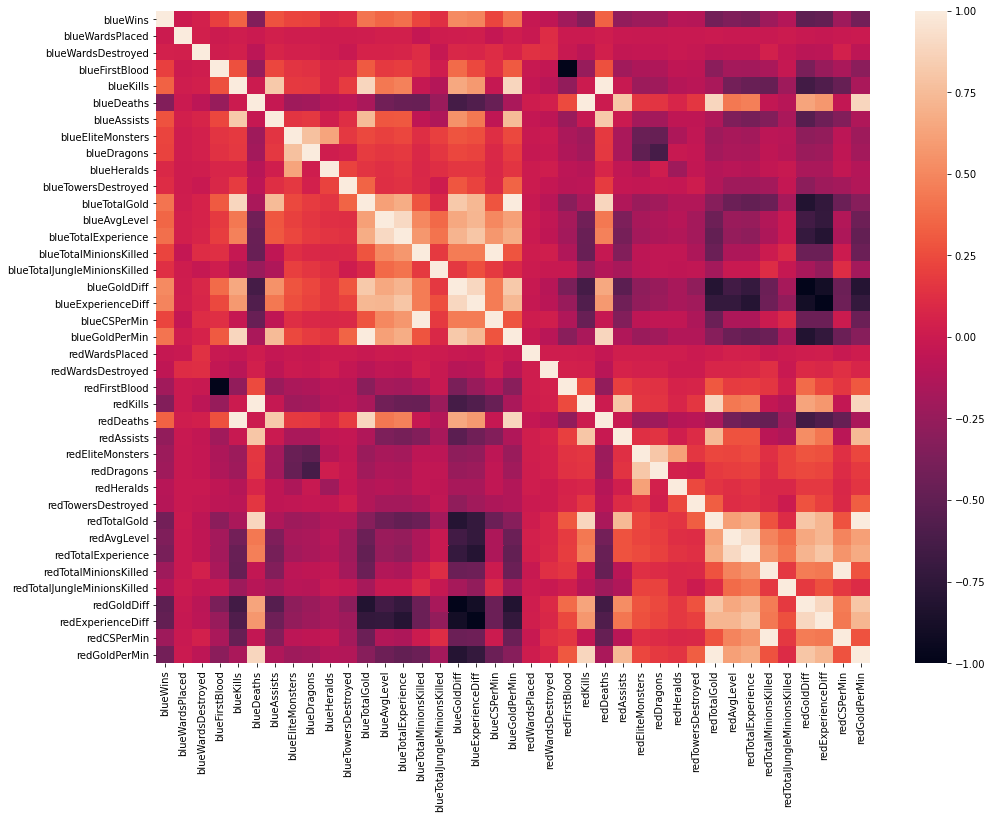

In [7]:
matrix = data.corr()
plt.figure(figsize=(16,12))
sns.heatmap(matrix)
plt.show()

#### Remove correlated features
Highly correlated data can slow our model while not offering any precision, especialy in games like League of Legends where once you have more kills you (usualy) have more gold that lets you get even more kills and objectives. Some features like redDeaths and blueKills are perfectly correlated so we don't need one of them at all.

In [8]:
def correlations(D,mainCorr=None, limit=0.95):
    #dataframe of boolean values of D dataFrame correlations, true iff |value|>=0.95
    highCorrColl = abs(D.corr())>=limit
    colls = []
    remove = []
    for coll in highCorrColl.columns:
        #we might delete a column we didn't visit
        if coll in highCorrColl.columns:
            #if any of the values is true and its not the same index as the column (since at (x,x) we always have a value of 1 so it will always be true)
            if highCorrColl[coll][highCorrColl[coll].index!=coll].any():
                #mainCorr is a series of correlation values of the main feature and the rest of the columns 
                if mainCorr is not None:
                    #get all the elements that have a high correlation with coll (including coll, (coll,coll) is always true) 
                    correl = highCorrColl[coll]
                    correl = correl[correl==True]

                    #get the representation of correl in the correlation series mainCorr
                    correlVals = mainCorr[correl.index]
                    
                    #indexs to remove, we want to keep the ones with the highest correlations to mainCorr/"blueWins"
                    removeIDX = correlVals[abs(correlVals).idxmax() != correlVals.index].index
                    highCorrColl = highCorrColl.drop(columns = removeIDX).drop(index = removeIDX)
                    remove.extend(removeIDX)
                else:
                    #if mainCorr was not passed, drop coll
                    highCorrColl = highCorrColl.drop(columns = coll).drop(index = coll)
                    remove.append(coll)
    return D.drop(columns=remove)

#custom class for pipeline
class FilterCorrelations(BaseEstimator, TransformerMixin):
    def __init__(self,mainCorr=None,limit=0.95):
        self.mainCorr=mainCorr
        self.limit = limit
    def fit(self, Data):
        return self
    def transform(self,Data):
        return correlations(Data,mainCorr=self.mainCorr, limit=self.limit)

#### Scale data
We will use sklearn's standard scaler since our data has many outliers since sometimes player "throw" a game resulting in an unexpected win or loss

In [9]:
#custom class for pipeline
class Scale(BaseEstimator, TransformerMixin):
    def fit(self, Data):
        return self
    def transform(self,Data):
        tempDF = Data.copy()
        Data = StandardScaler().fit_transform(Data)
        return pd.DataFrame(Data,columns=tempDF.columns,index=tempDF.index)

#### Find labels wihout correlation with winning

In [10]:
(abs(matrix["blueWins"])<=0).any()

False

## <u><b> Part 3 </b></u>

### Splitting data to train/test and making models

In [11]:
exp = df["blueWins"]
data = df.drop(columns=["blueWins"])

In [12]:
trainD, testD, trainE, testE = train_test_split(data, exp,random_state=rnd)
pipe = Pipeline([
    ("handle_correlations",FilterCorrelations(mainCorr=df.corr()["blueWins"],limit=0.95)),
    ('scaler',Scale())
])

In [13]:
trainD = pipe.fit_transform(trainD)
testD = pipe.transform(testD)

#### Finding lables with high importance
Since we have so many labels, we could try and remove some so the program could run faster without loss of accuracy

In [14]:
forest = ExtraTreesClassifier(n_estimators=250,random_state=rnd)
forest.fit(trainD,trainE)

ExtraTreesClassifier(n_estimators=250, random_state=42)

<AxesSubplot:ylabel='label'>

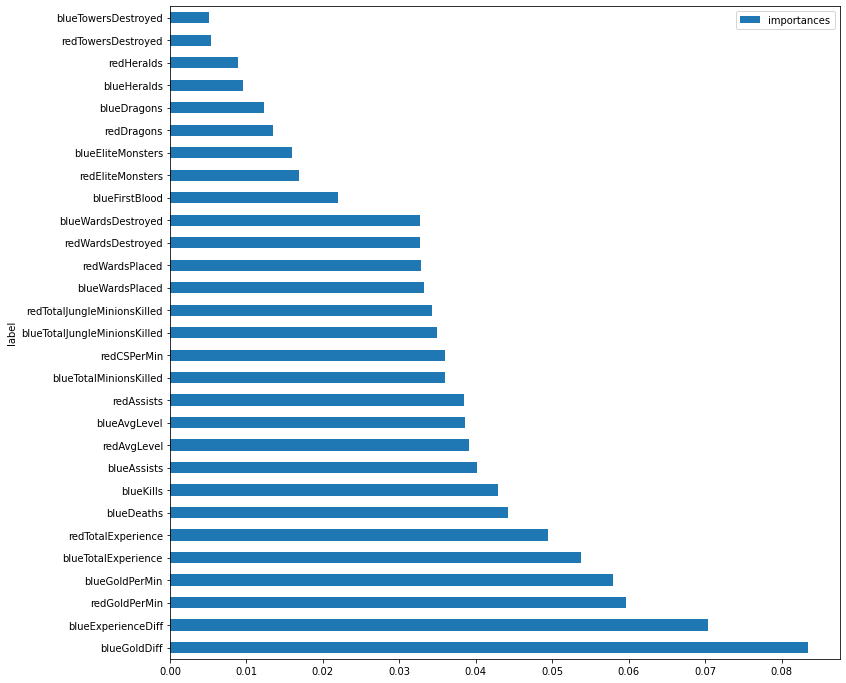

In [15]:
importanceDF = pd.DataFrame({"label":trainD.columns, "importances":forest.feature_importances_})
importanceDF.sort_values(by="importances",ascending=False,inplace=True)
importanceDF.plot(x="label",y="importances",kind="barh",figsize=(12,12))

In [16]:
trainD.drop(columns=trainD.columns.difference(importanceDF.head(8)["label"]),inplace=True)
testD.drop(columns=testD.columns.difference(importanceDF.head(8)["label"]),inplace=True)
importanceDF.head(8)["label"]

14           blueGoldDiff
15     blueExperienceDiff
28          redGoldPerMin
16         blueGoldPerMin
11    blueTotalExperience
25     redTotalExperience
4              blueDeaths
3               blueKills
Name: label, dtype: object

In [17]:
trainD.head()

,blueKills,blueDeaths,blueTotalExperience,blueGoldDiff,blueExperienceDiff,blueGoldPerMin,redTotalExperience,redGoldPerMin
4321,-1.052932,0.633371,-0.404560,-1.263563,-1.934750,-0.715087,2.712037,1.341937
6745,-0.061677,-0.382793,1.043472,0.011778,0.085236,0.006768,0.917076,-0.012404
5544,-0.061677,-0.044072,0.271409,0.082293,-0.099532,1.232106,0.434848,1.131424
6990,1.920831,0.294649,1.084063,1.204448,1.544691,1.709671,-1.396113,-0.222250
8785,-1.052932,-0.044072,-0.498168,-0.270280,-0.763345,-0.637329,0.727868,-0.210925


### KNN model


#### K=5
This will be our baseline model, we will try to get better results

In [18]:
knn5_clf = KNeighborsClassifier(n_neighbors=5)
knn5_clf.fit(trainD,trainE)
knn5_pred = knn5_clf.predict(testD)

In [19]:
knn5_accuracy = accuracy_score(testE,knn5_pred)
print("Accuracy:",knn5_accuracy)
print(classification_report(testE,knn5_pred))

Accuracy: 0.6902834008097166
              precision    recall  f1-score   support

           0       0.69      0.70      0.69      1236
           1       0.69      0.68      0.69      1234

    accuracy                           0.69      2470
   macro avg       0.69      0.69      0.69      2470
weighted avg       0.69      0.69      0.69      2470



#### Paramater tuning the for KNN model

In [20]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
#Parameters we want to use in order to find the best KNN model
param_grid=[
    {'n_neighbors':np.arange(1,31),'weights':["uniform","distance"]}
]
#change n_jobs for faster/slower performance

gridSearch = RandomizedSearchCV(knn_clf, param_grid, n_iter=30, scoring='accuracy', return_train_score=True,verbose=4,n_jobs=-1,random_state=rnd)

In [21]:
gridSearch.fit(trainD,trainE)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(estimator=KNeighborsClassifier(), n_iter=30, n_jobs=-1,
                   param_distributions=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                                         'weights': ['uniform', 'distance']}],
                   random_state=42, return_train_score=True, scoring='accuracy',
                   verbose=4)

In [22]:
uniforms = []
distances = []
for i in range(len(gridSearch.cv_results_['params'])):
    res = gridSearch.cv_results_['params'][i]
    #make a dictionary with {n_neighbors,weights,score} and append it in the right list
    res['score'] = gridSearch.cv_results_["mean_test_score"][i]
    if res["weights"]=="uniform": 
        uniforms.append(res)
    else:
        distances.append(res)
models = np.asarray([uniforms,distances])

C:\Users\zivmo\AppData\Roaming\Python\Python38\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Visualizing the performance of the models

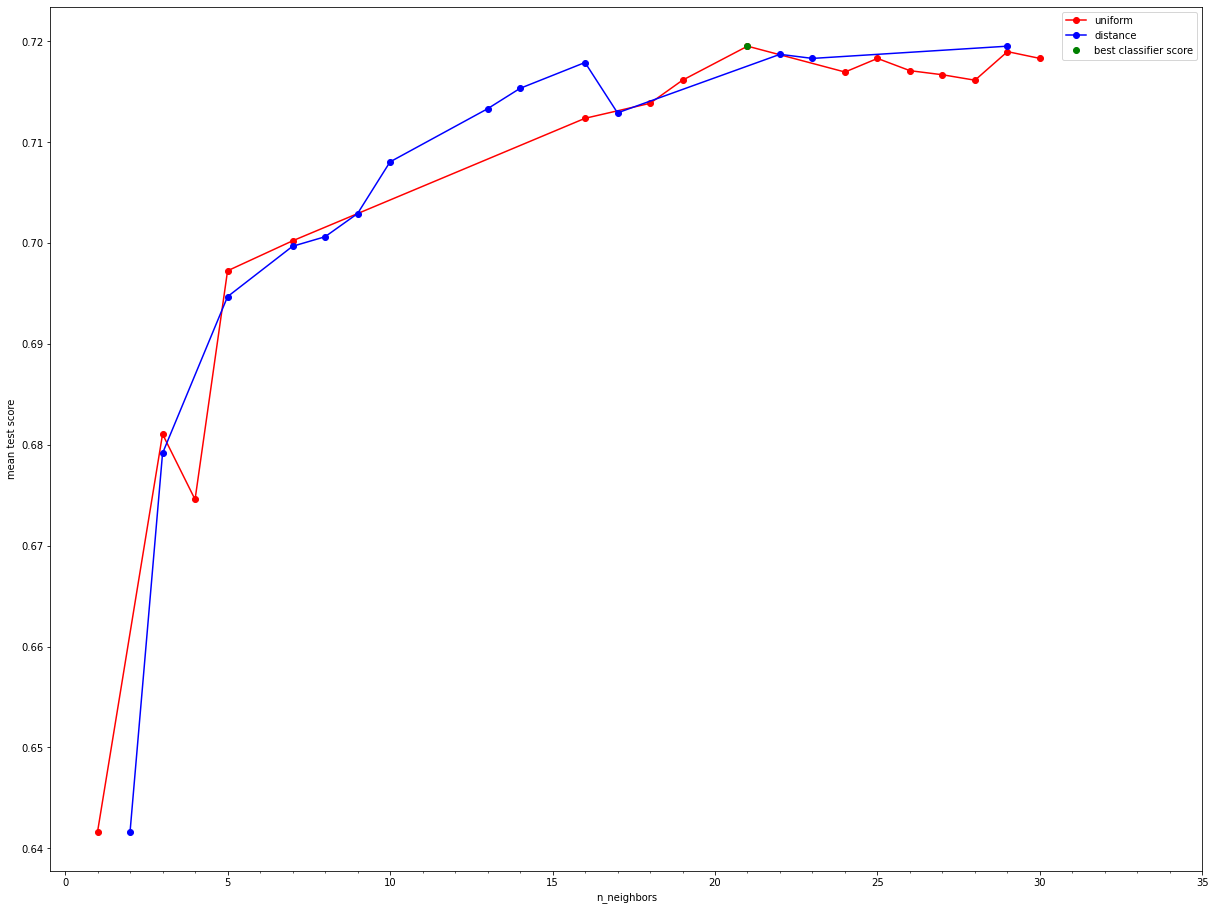

In [23]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_axes([0,0,1,1])
df1 = pd.DataFrame(models[0]).sort_values(by="n_neighbors")
df2 = pd.DataFrame(models[1]).sort_values(by="n_neighbors")
ax.plot(df1["n_neighbors"],df1["score"],"ro-")
ax.plot(df2["n_neighbors"],df2["score"],"bo-")
#place a green dot at the best classifier
ax.plot(gridSearch.best_estimator_.n_neighbors,gridSearch.best_score_,"go")
ax.set_ylabel("mean test score")
ax.set_xlabel("n_neighbors")
ax.legend(labels=["uniform","distance","best classifier score"])
ax.set_xticks([i for i in range(5*7+1)],minor=True)
ax.set_xticks([5*i for i in range(8)],minor=False)

plt.show()

#### Fitting KNN model

In [24]:
knn_clf = gridSearch.best_estimator_
knn_clf.fit(trainD,trainE)
knn_pred = knn_clf.predict(testD)
knn_clf

KNeighborsClassifier(n_neighbors=21)

In [25]:
knn_accuracy = accuracy_score(testE,knn_pred)
print("Accuracy:",knn_accuracy)
print(classification_report(testE,knn_pred))

Accuracy: 0.7048582995951417
              precision    recall  f1-score   support

           0       0.70      0.71      0.71      1236
           1       0.71      0.70      0.70      1234

    accuracy                           0.70      2470
   macro avg       0.70      0.70      0.70      2470
weighted avg       0.70      0.70      0.70      2470



### SVC model

#### Paramater tuning for the SVC model

In [26]:
svc_clf = SVC(random_state=rnd)
#Parameters we want to use in order to find the best KNN model
param_grid=[
    {'C':np.linspace(0.9,1.1,30),"gamma":["auto"]},
    {'C':np.linspace(0.9,1.1,30),"gamma":["scale"]}
]
#change n_jobs for faster/slower performance
gridSearch = RandomizedSearchCV(svc_clf, param_grid, n_iter=20, scoring='accuracy', return_train_score=True,verbose=4,n_jobs=-1,random_state=rnd)


In [27]:
gridSearch.fit(trainD,trainE)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(estimator=SVC(random_state=42), n_iter=20, n_jobs=-1,
                   param_distributions=[{'C': array([0.9       , 0.90689655, 0.9137931 , 0.92068966, 0.92758621,
       0.93448276, 0.94137931, 0.94827586, 0.95517241, 0.96206897,
       0.96896552, 0.97586207, 0.98275862, 0.98965517, 0.99655172,
       1.00344828, 1.01034483, 1.01724138, 1.02413793, 1.03103448,
       1.03793103, 1.04482759, 1.05172414, 1....
       0.93448276, 0.94137931, 0.94827586, 0.95517241, 0.96206897,
       0.96896552, 0.97586207, 0.98275862, 0.98965517, 0.99655172,
       1.00344828, 1.01034483, 1.01724138, 1.02413793, 1.03103448,
       1.03793103, 1.04482759, 1.05172414, 1.05862069, 1.06551724,
       1.07241379, 1.07931034, 1.0862069 , 1.09310345, 1.1       ]),
                                         'gamma': ['scale']}],
                   random_state=42, return_train_score=True, scoring='accuracy',
                   verbose=4)

In [28]:
gridSearch.cv_results_['params'][0]

{'gamma': 'auto', 'C': 0.9}

In [29]:
scale = []
auto = []
for i in range(len(gridSearch.cv_results_['params'])):
    res = gridSearch.cv_results_['params'][i]
    #make a dictionary with {n_neighbors,weights,score} and append it in the right list
    res['score'] = gridSearch.cv_results_["mean_test_score"][i]
    if res["gamma"]=="scale":
        scale.append(res)
    else:
        auto.append(res)
models = np.asarray([scale,auto])

C:\Users\zivmo\AppData\Roaming\Python\Python38\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


#### Visualizing the performance of the models

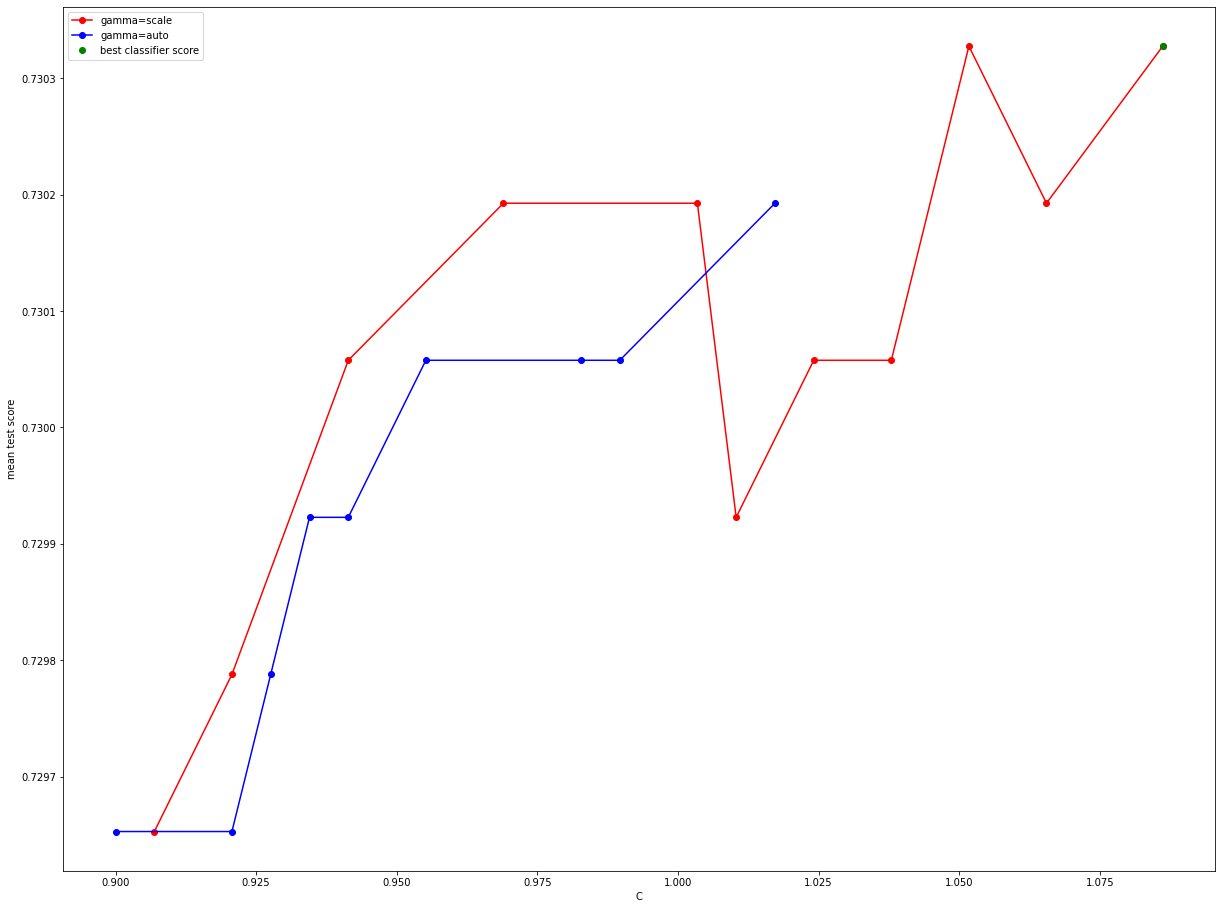

In [30]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_axes([0,0,1,1])
df1 = pd.DataFrame(models[0]).sort_values(by="C")
df2 = pd.DataFrame(models[1]).sort_values(by="C")
ax.plot(df1["C"],df1["score"],"ro-")
ax.plot(df2["C"],df2["score"],"bo-")
#place a green dot at the best classifier
ax.plot(gridSearch.best_estimator_.C,gridSearch.best_score_,"go")
ax.set_ylabel("mean test score")
ax.set_xlabel("C")
ax.legend(labels=["gamma=scale","gamma=auto","best classifier score"])
plt.show()

Fitting SVC model

In [31]:
svc_clf = gridSearch.best_estimator_
svc_clf.fit(trainD,trainE)
svc_pred = svc_clf.predict(testD)
svc_clf

SVC(C=1.0862068965517242, random_state=42)

In [32]:
svc_accuracy = accuracy_score(testE,svc_pred)
print("Accuracy:",svc_accuracy)
print(classification_report(testE,svc_pred))

Accuracy: 0.7170040485829959
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1236
           1       0.72      0.72      0.72      1234

    accuracy                           0.72      2470
   macro avg       0.72      0.72      0.72      2470
weighted avg       0.72      0.72      0.72      2470



## <u><b> Part 4 </b></u>

### Results

#### Confusion matrix

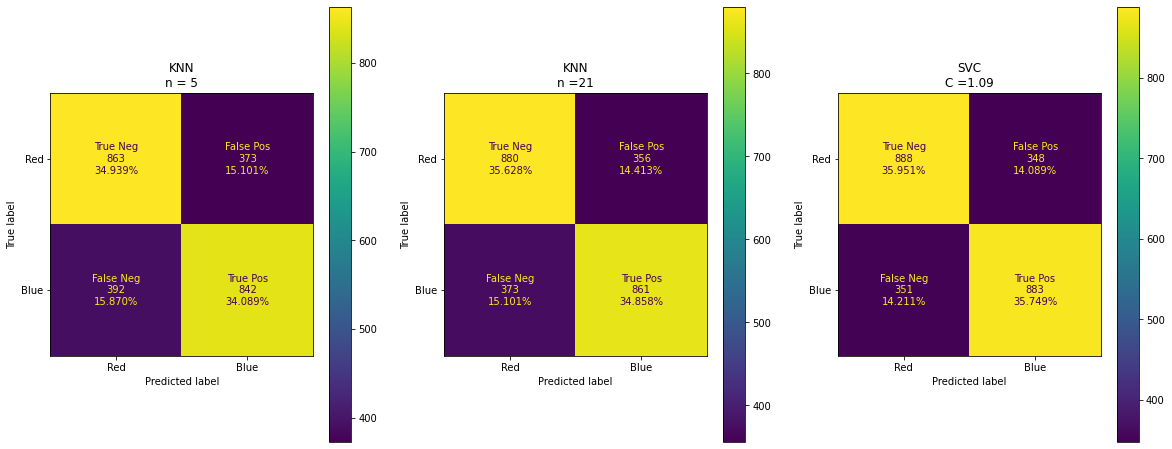

In [33]:
fig,axes = plt.subplots(ncols=3,figsize=(20,8),sharex=True)
cms = [None,None,None]
cms[0] = plot_confusion_matrix(knn5_clf,testD,testE,ax=axes[0],display_labels=["Red","Blue"],values_format="d")
cms[1] = plot_confusion_matrix(knn_clf,testD,testE,ax=axes[1],display_labels=["Red","Blue"],values_format="d")
cms[2] = plot_confusion_matrix(svc_clf,testD,testE,ax=axes[2],display_labels=["Red","Blue"],values_format="d")
vals = [["True Neg","False Pos"],["False Neg","True Pos"]]
for cm in cms:
    text = [[cm.text_[i][j].get_text() for j in range(len(cm.text_[i]))] for i in range(len(cm.text_))]
    for i in range(len(text)):
        for t in range(len(text[i])):
            txt = vals[i][t] + "\n" + text[i][t] + "\n" + '{0:.3f}'.format(100*(int(text[i][t])/len(testE)))+"%"
            cm.text_[i][t].set_text(txt)
        
axes[0].title.set_text("KNN\nn = 5")
axes[1].title.set_text("KNN\nn ="+str(knn_clf.n_neighbors))
axes[2].title.set_text("SVC\nC ="+str('{0:.2f}'.format(svc_clf.C)))



#### ROC curve

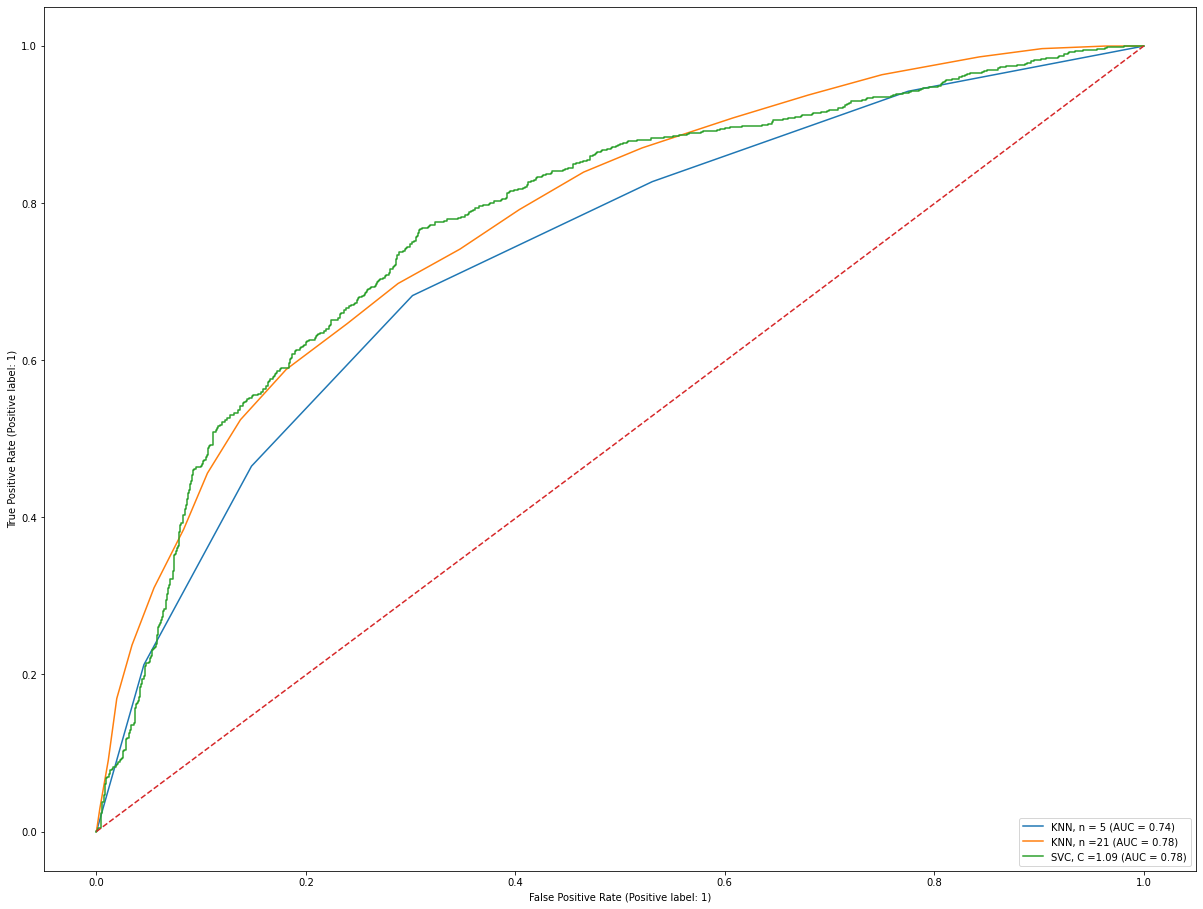

In [34]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_axes([0,0,1,1])
falsePosRate, truePosRate, _ = roc_curve(testE,np.random.choice([0,1],size=len(testE)))
plot_roc_curve(knn5_clf,testD,testE,ax=ax,name="KNN, n = 5")
plot_roc_curve(knn_clf,testD,testE,ax=ax,name="KNN, n ="+str(knn_clf.n_neighbors))
plot_roc_curve(svc_clf,testD,testE,ax=ax,name="SVC, C ="+str('{0:.2f}'.format(svc_clf.C)))
ax.plot(falsePosRate, truePosRate, linestyle='--')

#### Accuracy rate


In [35]:
print("Accuracy rate of KNN model (n = 5):",accuracy_score(testE,knn5_pred))
print("Accuracy rate of KNN model (n = " + str(knn_clf.n_neighbors) + "):",accuracy_score(testE,knn_pred))
print("Accuracy rate of SVC model (C = " + str('{0:.2f}'.format(svc_clf.C)) + "):",accuracy_score(testE,svc_pred))

Accuracy rate of KNN model (n = 5): 0.6902834008097166
Accuracy rate of KNN model (n = 21): 0.7048582995951417
Accuracy rate of SVC model (C = 1.09): 0.7170040485829959


## <u><b> Conclusions </b></u>

70%-73% seems like a low accuracy but considering the dataset is based on the first 10 minutes of a game, having anything over 65% is incredibly good!

This data shows us that although a large amount of the community think the game is over because of a single mistake at the start of the game, this is not actually the case.

In addition, the dataset doesn't list the champions on each team, some chamions are really good at the early part of the game like Renekton and Lee sin, but tend to fall off in the mid-late game while chamions like Veigar and Nasus tend to have a hard time at the early parts of the game, but can solo carry a game if kept unchecked.

Having only 70%-73% accuracy score is actually a very good sign! Since it means that players can't know who would win this early, meaning that their performance in the game won't change if they find out they have a 90% chance to lose or win, this can make it very frustrating, even for the winning team because the losing team could choose to surrender at minute 15 and not allow the winning team enjoy their win properly. 

Since we only have data from the 10 minute mark, we can only get a 70%-73% accuracy score, but if we had data from minute 15 or 20, I would expect an accuracy rate closer to 80%-85%.

## <u><b> Part 5 </b></u>

### Improvements

Now we will try to imorove our model, lets see if we can reach a better accuracy and at the very least, reduce the amount of features we need to get an accurate result

In [36]:
from sklearn.decomposition import PCA
import time
from sklearn.preprocessing import Normalizer

In [37]:
df.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [38]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ["blueWins"]), df["blueWins"], random_state=rnd)


In [39]:
X_train_new = X_train.drop(columns=X_train.columns.difference(importanceDF.head(8)["label"]))
X_test_new = X_test.drop(columns=X_train.columns.difference(importanceDF.head(8)["label"]))
importanceDF.head(8)["label"]

14           blueGoldDiff
15     blueExperienceDiff
28          redGoldPerMin
16         blueGoldPerMin
11    blueTotalExperience
25     redTotalExperience
4              blueDeaths
3               blueKills
Name: label, dtype: object

In [40]:
scale = Normalizer()
X_train_new = scale.fit_transform(X_train_new)
X_test_new = scale.transform(X_test_new)

In [41]:
scale = StandardScaler()

#X_train_new = scale.fit_transform(X_train_new)
#X_test_new = scale.transform(X_test_new)

#### PCA
Let's first start by reducing our model's complexity using PCA 

In [42]:
pca = PCA(random_state=rnd)
pca.fit(X_train_new)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
pca.fit(X_train_new)
exp_var_cumul2 = np.cumsum(pca.explained_variance_ratio_)

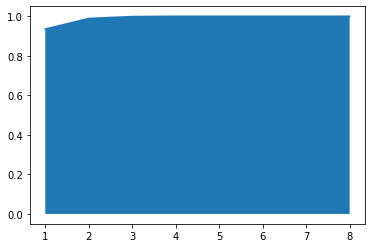

In [43]:
fig, ax = plt.subplots()
ax.plot(range(1,exp_var_cumul.shape[0] + 1),exp_var_cumul)
ax.fill_between(range(1,exp_var_cumul.shape[0] + 1),exp_var_cumul,0)



In [44]:
dim = len(exp_var_cumul[exp_var_cumul<0.95])
exp_var_cumul[dim], dim

(0.9889475621176121, 1)

In [45]:
pipe = Pipeline([
    ("normalizer",Normalizer()),
    ("pca",PCA(n_components=dim,random_state=rnd))
],verbose=True)

In [46]:
X_train_new = pipe.fit_transform(X_train_new)
X_test_new = pipe.transform(X_test_new)

[Pipeline] ........ (step 1 of 2) Processing normalizer, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing pca, total=   0.2s


In [47]:
X_train_new

array([[-0.19323919],
       [ 0.00595015],
       [-0.000449  ],
       ...,
       [ 0.13858901],
       [-0.02188215],
       [-0.09520235]])

In [48]:
dtrain = xgb.DMatrix(X_train_new, label=y_train)
dtest = xgb.DMatrix(X_test_new, label=y_test)

#### paramater tuning


def param_search(param_grid,train,test,train_labels,test_labels,randomSeed=rnd,nfolds=5,eval_method="auc",num_class=2,num_boost_round=10000,early_stopping_rounds=40,verbose=True):
    done = 0
    amount = len(param_grid)
    params = {
        'random_state':randomSeed,
        'eval_metric':eval_method,
    }
    start = time.time()
    timer = time.time()
    best_eval = -float("inf")
    best_eval_train = 0
    best_params = {}
    best_iter = 0
    best_out = ''
    for p in param_grid:
        out = ''
        for key in p:
            params[key] = p[key]
            out += key + '=' + str(p[key])+', '
        out = out[:-2]
        
        results = xgb.cv(params,train,num_boost_round=num_boost_round,nfold=nfolds,metrics={eval_method},early_stopping_rounds=early_stopping_rounds,seed=randomSeed)
        
        done +=1 
        #get mean score of cv of the training and testing, and get the best iteration
        mean_eval_test = results['test-'+eval_method+'-mean'].min()
        mean_eval_train = results['test-'+eval_method+'-mean'].min()
        iteration = results['test-'+eval_method+'-mean'].argmin()
        
        #update best parameters
        if mean_eval_test > best_eval:
            best_eval = mean_eval_test
            best_eval_train = mean_eval_train
            best_out = ''
            best_iter = iteration
            for key in p:
                best_out += key + '=' + str(p[key])+', '
                best_params[key] = p[key]
            best_out = best_out[:-2]

        #show results of cv
        if verbose:
            print("Parameters: "+out)
            print("Mean train "+eval_method+": "+str(mean_eval_train) + " Mean test "+eval_method+": "+str(mean_eval_test) + " Iteration: "+str(iteration))
            print(str(done)+"/"+str(amount))
            
            if (time.time()-timer) > 300:
                print(str((time.time()-start)/60) +"m elapsed. Finished "+str(100*done/amount)+"%" )
                timer = time.time()
            print("")
    stop = time.time()
    if verbose:
        print("----------------------------------------")
    print(f"Tuning time: {(time.time()-start)}s")
    print("Best parameters: "+best_out+":")
    print("Best mean train "+eval_method+": "+str(best_eval_train) + " Best mean test "+eval_method+": "+str(best_eval) + " Best iteration: "+str(iteration))
    
    #show accuracy score
    bst = xgb.train(dict({'random_state':randomSeed,'eval_metric':eval_method,'num_class':num_class},**best_params), train, best_iter+1)
    test_preds = bst.predict(test)
    train_preds = bst.predict(train)

    print("Test accuracy:",accuracy_score(test_labels,test_preds),"Train accuracy:",accuracy_score(train_labels,train_preds))
    return best_params,best_iter+1

In [51]:
def param_search(param_grid,train,test,train_labels,test_labels,num_class=2,randomSeed=rnd,nfolds=5,eval_method="auc",higher_better=True,num_boost_round=10000,early_stopping_rounds=40,verbose=True):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
    done = 0
    amount = len(param_grid)
    params = {
        'random_state':randomSeed,
        'eval_metric':eval_method,
    }
    start = time.time()
    timer = time.time()
    if higher_better: 
        best_eval = -float("inf")
    else:
        best_eval = float("inf")
    best_eval_train = 0
    best_params = {}
    best_iter = 0
    best_out = ''
    with tqdm(total=len(param_grid)) as pbar:
        for p in param_grid:
            out = ''
            for key in p:
                params[key] = p[key]
                out += key + '=' + str(p[key])+', '
            out = out[:-2]
            
            results = xgb.cv(params,train,num_boost_round=num_boost_round,nfold=nfolds,metrics={eval_method},early_stopping_rounds=early_stopping_rounds,seed=randomSeed)
            
            ax1.plot(results.index,results['test-'+eval_method+'-mean'],label=out[:25])
            ax2.plot(results.index,results['train-'+eval_method+'-mean'],label=out[:25])
            ax1.set_title("test")
            ax2.set_title("train")
            ax1.legend()
            ax2.legend()
            
            done +=1 
            #get mean score of cv of the training and testing, and get the best iteration
            if higher_better==False:
                mean_eval_test = results['test-'+eval_method+'-mean'].min()
                mean_eval_train = results['test-'+eval_method+'-mean'].min()
                iteration = results['test-'+eval_method+'-mean'].argmin()
            else: 
                mean_eval_test = results['test-'+eval_method+'-mean'].max()
                mean_eval_train = results['test-'+eval_method+'-mean'].max()
                iteration = results['test-'+eval_method+'-mean'].argmax()
            
            #update best parameters
            if (mean_eval_test < best_eval and higher_better==False) or (mean_eval_test > best_eval and higher_better):
                best_eval = mean_eval_test
                best_eval_train = mean_eval_train
                best_out = ''
                best_iter = iteration
                for key in p:
                    best_out += key + '=' + str(p[key])+', '
                    best_params[key] = p[key]
                best_out = best_out[:-2]

            #show results of cv
            if verbose:
                print("Parameters: "+out)
                print("Mean train "+eval_method+": "+str(mean_eval_train) + " Mean test "+eval_method+": "+str(mean_eval_test) + " Iteration: "+str(iteration))
                print(str(done)+"/"+str(amount))
                
                if (time.time()-timer) > 300:
                    print(str((time.time()-start)/60) +"m elapsed. Finished "+str(100*done/amount)+"%" )
                    timer = time.time()
                print("")
            pbar.update(1)
    stop = time.time()
    if verbose:
        print("----------------------------------------")
    print(f"Tuning time: {(time.time()-start)}s")
    print("Best parameters: "+best_out+":")
    print("Best mean train "+eval_method+": "+str(best_eval_train) + " Best mean test "+eval_method+": "+str(best_eval) + " Best iteration: "+str(iteration))
    
    #show accuracy score
    bst = xgb.train(dict({'random_state':randomSeed,'eval_metric':eval_method,'num_class':num_class},**best_params), train, best_iter+1)
    test_preds = bst.predict(test)
    train_preds = bst.predict(train)

    print("Test accuracy:",accuracy_score(test_labels,test_preds),"Train accuracy:",accuracy_score(train_labels,train_preds))
    return best_params,best_iter+1

In [52]:
params = {
    'tree_method':'hist',
    'n_jobs':-1
}

In [53]:
grid = [
    dict({'learning_rate':lr},**params) 
    for lr in [0.001,0.005,0.01,0.05,0.1,0.2,0.25,0.3,0.35,0.4,0.5,0.7]
]

In [54]:
params,_ = param_search(grid,dtrain,dtest,y_train,y_test)

NameError: name 'tqdm' is not defined

In [171]:
grid = [
    dict({'max_depth':i,'min_child_weight':j},**params) 
    for i in [1,3,6,9,12]
    for j in [1,3,5,8,10]
]

In [172]:
params,_ = param_search(grid,dtrain,dtest,y_train,y_test)

Parameters: max_depth=1, min_child_weight=1, learning_rate=0.25, tree_method=hist, n_jobs=-1
Mean train auc: 0.724713 Mean test auc: 0.724713 Iteration: 0
1/25

Parameters: max_depth=1, min_child_weight=3, learning_rate=0.25, tree_method=hist, n_jobs=-1
Mean train auc: 0.724713 Mean test auc: 0.724713 Iteration: 0
2/25

Parameters: max_depth=1, min_child_weight=5, learning_rate=0.25, tree_method=hist, n_jobs=-1
Mean train auc: 0.724713 Mean test auc: 0.724713 Iteration: 0
3/25

Parameters: max_depth=1, min_child_weight=8, learning_rate=0.25, tree_method=hist, n_jobs=-1
Mean train auc: 0.724713 Mean test auc: 0.724713 Iteration: 0
4/25

Parameters: max_depth=1, min_child_weight=10, learning_rate=0.25, tree_method=hist, n_jobs=-1
Mean train auc: 0.724713 Mean test auc: 0.724713 Iteration: 0
5/25

Parameters: max_depth=3, min_child_weight=1, learning_rate=0.25, tree_method=hist, n_jobs=-1
Mean train auc: 0.7973834 Mean test auc: 0.7973834 Iteration: 0
6/25

Parameters: max_depth=3, min_ch

In [173]:
grid = [
    dict({'gamma':g},**params) 
    for g in [0,1,2,3,4,5]
]

In [174]:
params,_ = param_search(grid,dtrain,dtest,y_train,y_test)

Parameters: gamma=0, max_depth=3, min_child_weight=1, learning_rate=0.25, tree_method=hist, n_jobs=-1
Mean train auc: 0.7973834 Mean test auc: 0.7973834 Iteration: 0
1/6

Parameters: gamma=1, max_depth=3, min_child_weight=1, learning_rate=0.25, tree_method=hist, n_jobs=-1
Mean train auc: 0.7973834 Mean test auc: 0.7973834 Iteration: 0
2/6

Parameters: gamma=2, max_depth=3, min_child_weight=1, learning_rate=0.25, tree_method=hist, n_jobs=-1
Mean train auc: 0.7966754 Mean test auc: 0.7966754 Iteration: 0
3/6

Parameters: gamma=3, max_depth=3, min_child_weight=1, learning_rate=0.25, tree_method=hist, n_jobs=-1
Mean train auc: 0.7954204 Mean test auc: 0.7954204 Iteration: 0
4/6

Parameters: gamma=4, max_depth=3, min_child_weight=1, learning_rate=0.25, tree_method=hist, n_jobs=-1
Mean train auc: 0.7952975999999999 Mean test auc: 0.7952975999999999 Iteration: 0
5/6

Parameters: gamma=5, max_depth=3, min_child_weight=1, learning_rate=0.25, tree_method=hist, n_jobs=-1
Mean train auc: 0.7944022

In [175]:
grid = [
    dict({'subsample':i,'colsample_bytree':j},**params) 
    for i in [0.7,0.8,0.9,1]
    for j in [0.7,0.8,0.9,1]
]

In [176]:
params,_ = param_search(grid,dtrain,dtest,y_train,y_test)

Parameters: subsample=0.7, colsample_bytree=0.7, gamma=0, max_depth=3, min_child_weight=1, learning_rate=0.25, tree_method=hist, n_jobs=-1
Mean train auc: 0.7983236 Mean test auc: 0.7983236 Iteration: 0
1/16

Parameters: subsample=0.7, colsample_bytree=0.8, gamma=0, max_depth=3, min_child_weight=1, learning_rate=0.25, tree_method=hist, n_jobs=-1
Mean train auc: 0.7983236 Mean test auc: 0.7983236 Iteration: 0
2/16

Parameters: subsample=0.7, colsample_bytree=0.9, gamma=0, max_depth=3, min_child_weight=1, learning_rate=0.25, tree_method=hist, n_jobs=-1
Mean train auc: 0.7983236 Mean test auc: 0.7983236 Iteration: 0
3/16

Parameters: subsample=0.7, colsample_bytree=1, gamma=0, max_depth=3, min_child_weight=1, learning_rate=0.25, tree_method=hist, n_jobs=-1
Mean train auc: 0.7983236 Mean test auc: 0.7983236 Iteration: 0
4/16

Parameters: subsample=0.8, colsample_bytree=0.7, gamma=0, max_depth=3, min_child_weight=1, learning_rate=0.25, tree_method=hist, n_jobs=-1
Mean train auc: 0.796800600

In [177]:
grid = [
    dict({'reg_lambda':i},**params) 
    for i in [1,5,10,15,20,25]
]

In [178]:
params,estimators = param_search(grid,dtrain,dtest,y_train,y_test)

Parameters: reg_lambda=1, subsample=0.7, colsample_bytree=0.7, gamma=0, max_depth=3, min_child_weight=1, learning_rate=0.25, tree_method=hist, n_jobs=-1
Mean train auc: 0.7983236 Mean test auc: 0.7983236 Iteration: 0
1/6

Parameters: reg_lambda=5, subsample=0.7, colsample_bytree=0.7, gamma=0, max_depth=3, min_child_weight=1, learning_rate=0.25, tree_method=hist, n_jobs=-1
Mean train auc: 0.7981236 Mean test auc: 0.7981236 Iteration: 0
2/6

Parameters: reg_lambda=10, subsample=0.7, colsample_bytree=0.7, gamma=0, max_depth=3, min_child_weight=1, learning_rate=0.25, tree_method=hist, n_jobs=-1
Mean train auc: 0.7981176000000001 Mean test auc: 0.7981176000000001 Iteration: 0
3/6

Parameters: reg_lambda=15, subsample=0.7, colsample_bytree=0.7, gamma=0, max_depth=3, min_child_weight=1, learning_rate=0.25, tree_method=hist, n_jobs=-1
Mean train auc: 0.7980031999999999 Mean test auc: 0.7980031999999999 Iteration: 0
4/6

Parameters: reg_lambda=20, subsample=0.7, colsample_bytree=0.7, gamma=0, m

### Final model

In [198]:
model = xgb.XGBClassifier(n_estimators = estimators, random_state=rnd,**params,eval_metric="mae")


In [199]:
model.fit(X_train_new,y_train)

C:\Users\zivmo\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='mae',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.25, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1, n_jobs=-1,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.7, tree_method='hist',
              validate_parameters=1, verbosity=None)

In [200]:
pred_test = model.predict(X_test_new)
pred_train = model.predict(X_train_new)

#### Results

In [201]:
def plot_model_results(model,X,y,title=""):
   
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(title)
    cm = plot_confusion_matrix(model,X,y,display_labels=["Red","Blue"],values_format="d",ax=ax1)
    fig.set_size_inches(20,10)
    num = cm.text_[0][0].get_text()
    txt = "True Negative"+ "\n" + num + "\n" + '{0:.3f}'.format(100*(int(num)/len(y)))+"%"
    cm.text_[0][0].set_text(txt)
    
    num = cm.text_[1][0].get_text()
    txt = "False Negative"+ "\n" + num + "\n" + '{0:.3f}'.format(100*(int(num)/len(y)))+"%"
    cm.text_[1][0].set_text(txt)

    num = cm.text_[0][1].get_text()
    txt = "False Positive"+ "\n" + num + "\n" + '{0:.3f}'.format(100*(int(num)/len(y)))+"%"
    cm.text_[0][1].set_text(txt)

    num = cm.text_[1][1].get_text()
    txt = "True Positive"+ "\n" + num + "\n" + '{0:.3f}'.format(100*(int(num)/len(y)))+"%"
    cm.text_[1][1].set_text(txt)
    
    falsePosRate, truePosRate, _ = roc_curve(y,np.random.choice([0,1],size=len(y)))
    plot_roc_curve(model,X,y,ax=ax2)
    ax2.plot(falsePosRate, truePosRate, linestyle='--')

In [202]:
print("Train accuracy:",accuracy_score(y_train,pred_train))
print(classification_report(y_train,pred_train))

Train accuracy: 0.7288432986907815
              precision    recall  f1-score   support

           0       0.74      0.70      0.72      3713
           1       0.72      0.76      0.74      3696

    accuracy                           0.73      7409
   macro avg       0.73      0.73      0.73      7409
weighted avg       0.73      0.73      0.73      7409



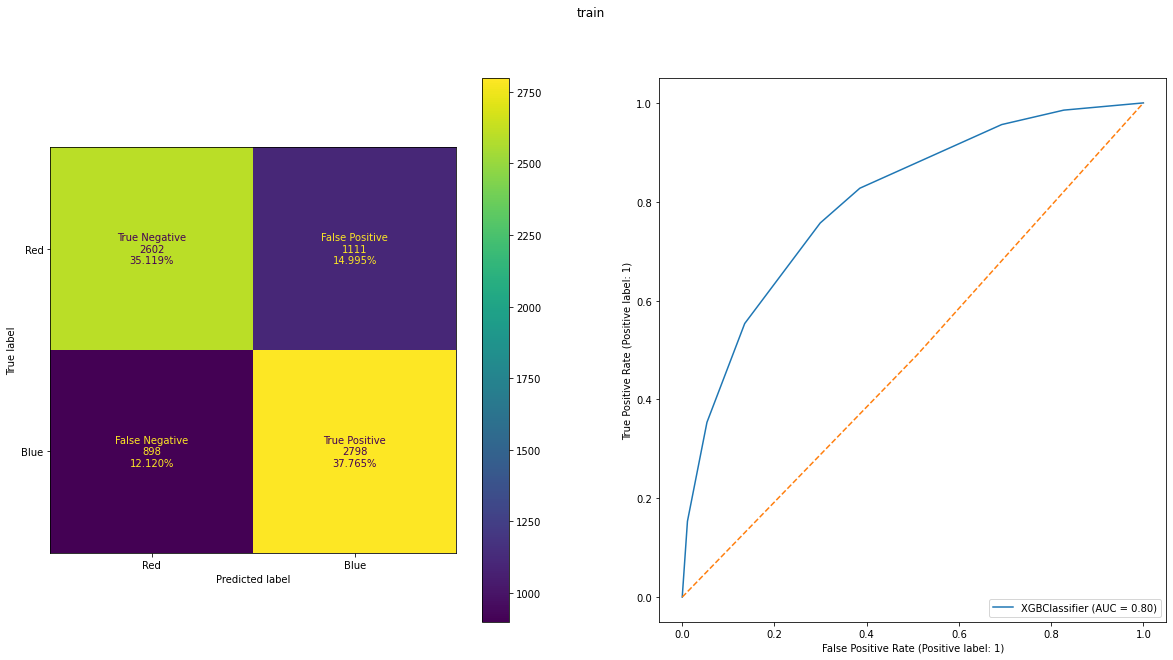

In [203]:

plot_model_results(model,X_train_new,y_train,title="train")

In [204]:
model_accuracy = accuracy_score(y_test,pred_test)
print("Test accuracy:",model_accuracy)
print(classification_report(y_test,pred_test))

Test accuracy: 0.7251012145748987
              precision    recall  f1-score   support

           0       0.74      0.70      0.72      1236
           1       0.71      0.75      0.73      1234

    accuracy                           0.73      2470
   macro avg       0.73      0.73      0.72      2470
weighted avg       0.73      0.73      0.72      2470



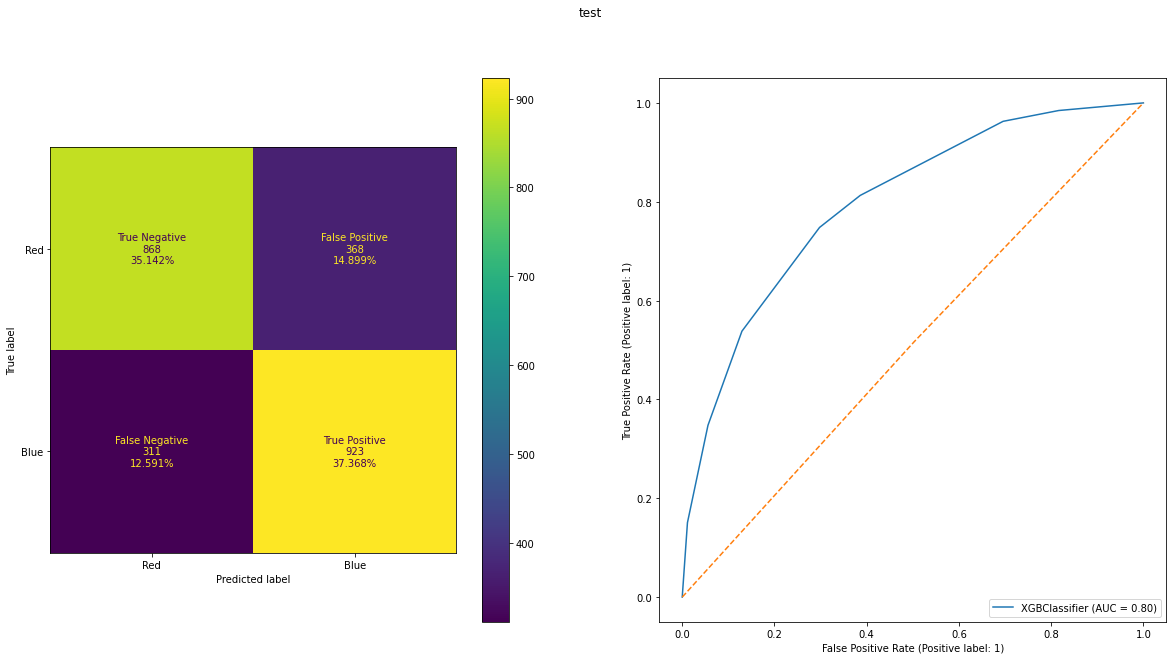

In [205]:

plot_model_results(model,X_test_new,y_test,title="test")

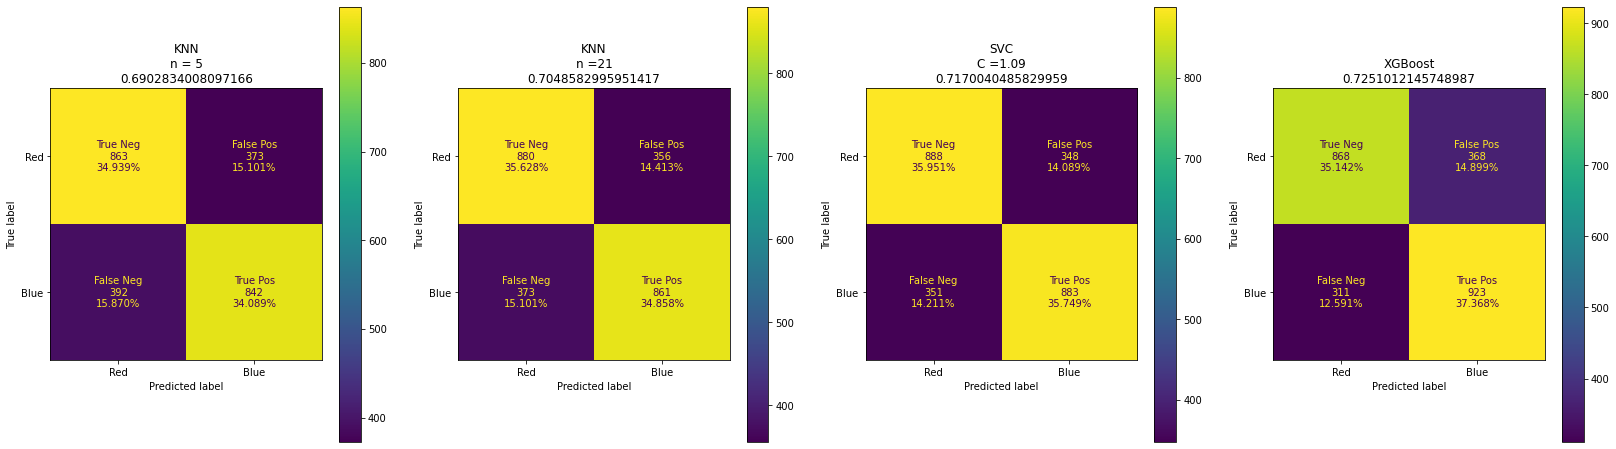

In [206]:
fig,axes = plt.subplots(ncols=4,figsize=(28,8),sharex=True)
cms = [None,None,None,None]
cms[0] = plot_confusion_matrix(knn5_clf,testD,testE,ax=axes[0],display_labels=["Red","Blue"],values_format="d")
cms[1] = plot_confusion_matrix(knn_clf,testD,testE,ax=axes[1],display_labels=["Red","Blue"],values_format="d")
cms[2] = plot_confusion_matrix(svc_clf,testD,testE,ax=axes[2],display_labels=["Red","Blue"],values_format="d")
cms[3] = plot_confusion_matrix(model,X_test_new,y_test,ax=axes[3],display_labels=["Red","Blue"],values_format="d")
vals = [["True Neg","False Pos"],["False Neg","True Pos"]]
for cm in cms:
    text = [[cm.text_[i][j].get_text() for j in range(len(cm.text_[i]))] for i in range(len(cm.text_))]
    for i in range(len(text)):
        for t in range(len(text[i])):
            txt = vals[i][t] + "\n" + text[i][t] + "\n" + '{0:.3f}'.format(100*(int(text[i][t])/len(testE)))+"%"
            cm.text_[i][t].set_text(txt)
        
axes[0].title.set_text("KNN\nn = 5\n"+str(knn5_accuracy))
axes[1].title.set_text("KNN\nn ="+str(knn_clf.n_neighbors)+"\n"+str(knn_accuracy))
axes[2].title.set_text("SVC\nC ="+str('{0:.2f}'.format(svc_clf.C))+"\n"+str(svc_accuracy))
axes[3].title.set_text("XGBoost\n"+str(model_accuracy))

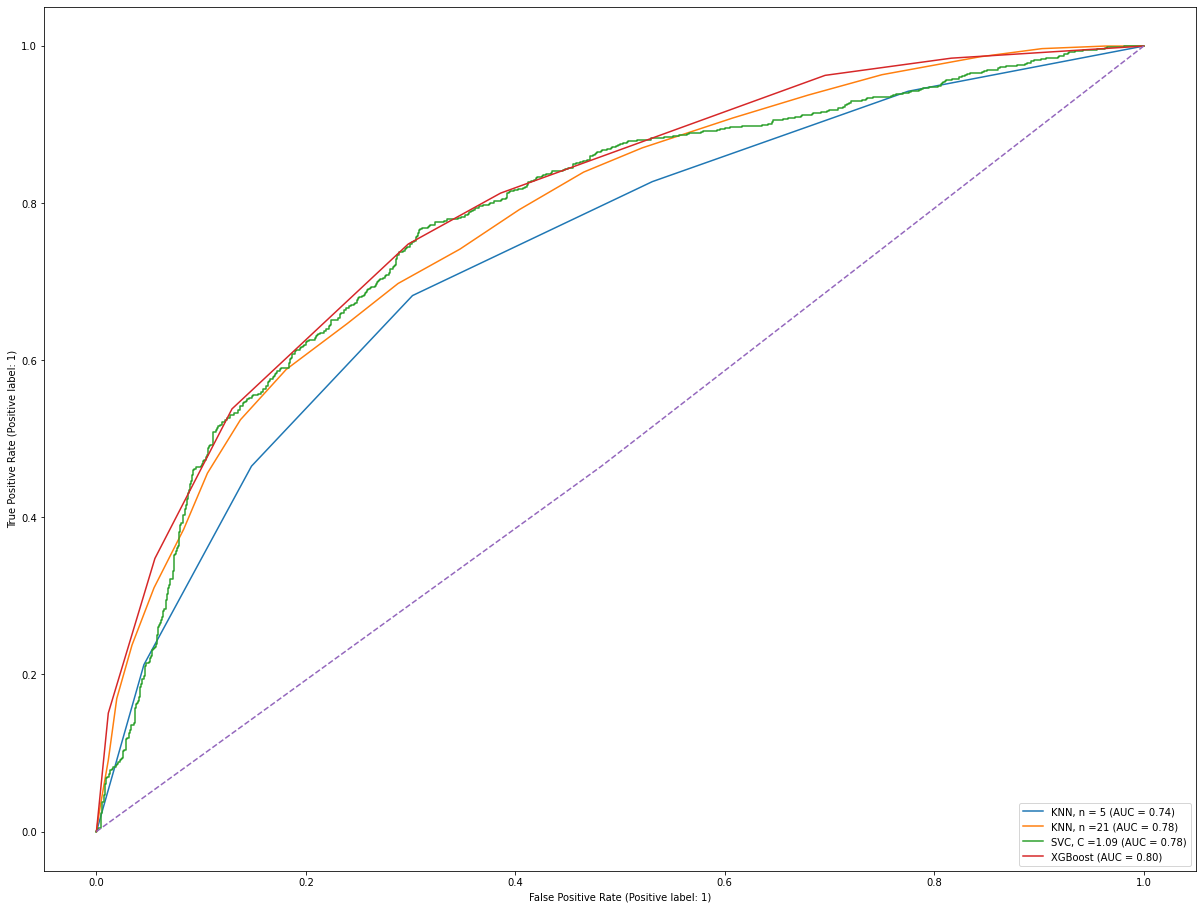

In [207]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_axes([0,0,1,1])
falsePosRate, truePosRate, _ = roc_curve(testE,np.random.choice([0,1],size=len(testE)))
plot_roc_curve(knn5_clf,testD,testE,ax=ax,name="KNN, n = 5")
plot_roc_curve(knn_clf,testD,testE,ax=ax,name="KNN, n ="+str(knn_clf.n_neighbors))
plot_roc_curve(svc_clf,testD,testE,ax=ax,name="SVC, C ="+str('{0:.2f}'.format(svc_clf.C)))
plot_roc_curve(model,X_test_new,y_test,ax=ax,name="XGBoost")

ax.plot(falsePosRate, truePosRate, linestyle='--')

## <u><b> Conclusions </b></u>

Not only have we improved our model's accuracy, we also managed to do so using only 1 feature instead of 8 like with the old model, however, like explained prior we only reached an accuracy of 72.5%.

Although we managed to improve only by about 1% we managed to do so using 1/8 the amount of features so we could say this is a major improvement from the last model.